# IMU based Gesture Recognition

In this notebook the Gesture recognition process is evaluated. Not only do the technical aspects have an impact on the estimation accuracy, but also the users, who operate the system. This is shown in the several experiments listed below:

### Notebook Overview:
1. **Technical aspects**:
    1. **Baseline Validation**: (A1)-Test: Train-Validation-set-split of a __single dataset__ from an __experienced user__ 
    2. **System Validation**: Train-Test-set-split of two independant datasets. One is used for training and one for testing: (A1-A2)-Test: Algorithm is applied to datasets from an __experienced user__ --> _very high prediction accuracy_
2. **Human impacts**:
    1. **Human-Learning-Process**: (B1-B2)-Test: Algorithm is applied to datasets from an __inexperienced user__ --> _low prediction accuracy_
    2. **Impact of forgetting gesture executions**: (A1-A3)-Test Algorithm is applied to datasets from an __experienced user__ --> _medium prediction accuracy_
    3. **User-dependancy test**: (A1-B2)-Test: Algorithm is applied to datasets from two __experienced, different users__ --> _very low prediction accuracy_
3. **Conclusion**: Here all experiments are summarized.

---

### Gestures and RawData:
This section introduces the gestures that are used to validate the system: The table below, shows the gestures and also explains how these must be executed.

The gesture names are the same, that are displayed in the confusion matrix


<img src="img/gestureTable_1.png">

The data is recorded in the following way: 
1. First a trigger button must be pressed. 
2. Afterwards the IMU sensor records  all of its readings for 1.4 seconds and 
3. writes them into a .csv- File (see raw_data.csv in the /data folder)
----

#### provided datasets
The following datasets can be used for evaluation (see folder /data):
```
# Available datasets:
# User A: 'User_A1_011017', 'User_A2_011017', 'User_A3_121017' 
# User B: 'User_B1_131017', 'User_B2_131017'
# User C: 'User_C1_071017' 
```
These datasets (folder string-descriptions) can be directly used for the experiments, listed below. 3 different users have recorded these datasets (User A,B,C). Furthermore, the recording date is included. The datasets reflect the real-life dataquality that can be expected. Some of them contain biases, as they occur in the recording process.
Generally speaking: 
- __User A: very experienced user__ - has trained the system at least 5 times. All datasets show consistent data quality
- __User B: inexperienced user__ - has trained the system only two times (both datasets are included here)
- __User C: inexperienced user__ - has trained the system only a single time.

---

In [6]:
# imports
from GesBerry_eval import conf_matrix, clf_acc, cross_val, x_y_test, x_test

from sklearn.model_selection import train_test_split # ---- vers. scikit-learn: 0.19.1
from sklearn.ensemble import RandomForestClassifier

# globals
frame_size = 140 # ---------------------------------------- 1.4 seconds recording window

---

# 1. Technical System Validation:

## 1.1. Baseline validation - (A1-Test)

One dataset of an experienced user is used for training and validation. This was used originally to garantue the classifiers basic functionality. Now it can also be used to verify the data quality-consistency within one dataset (An example for an inconsistent dataset: try ```'User_B1_131017'``` as the argument. The aspect of experience is is explained in more detail in section 2). 

The experiment follows the following procedure:
1. Get labeled dataset and split it into training and validation set (Split ratio: training: 70%, validation 30%) (see ```GesBerry_get_data.py```)
2. preprocess and learn from training data; afterwards put a decision boundary function out. The decision boundary function contains the knowledge of the classifier on how to relate the data to the gestures (Preprocessing: ```GesBerry_prep.py```; Machine Learning - in the x_test or x_y_test: ```GesBerry_eval.py```)
3. preprocess and classify the data. The preprocessing is the same as in step 2. The labels are excluded and the classifier identifies the labels of the gestures (Preprocessing: ```GesBerry_prep.py```; Machine Learning - in the x_test or x_y_test: ```GesBerry_eval.py```).
4. Evaluate the classification results in 3 experiments (see ```GesBerry_eval.py```):
    - Confusion matrix
    - Accuracy score
    - k-fold crossvalidation score
    
All concerning functions can be found in the stated python scripts


<br/>

<img src="img/flowchart_A1Test_(1).png" width="420">

<br/>

RandomForestClassifier ---> Crossval score Accuracy: 0.96 (+/- 0.16)
Accuracy of the current Train_test-split --------- : 0.95


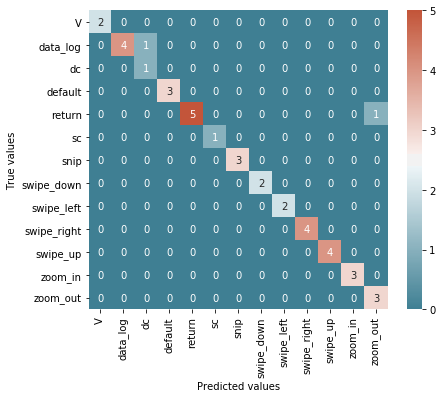

In [3]:
x_test('User_A1_011017') # A1-Test function call

The confusion matrix and the accuracy score only display the score of the current train-test-split. This score is useful for an approximate evaluation. Besides this, the confusion matrix can also show the gestures that are difficult to detect. However the Crossval score (10-fold-cross-validation score) is a more precise indicator. In the example above, this score is higher than 95%. Therefore the proposed classifier shows good performance. 

## 1.2. System Validation: (A1-A2)-Test

For a more precise evaluation the system must be trained and tested with seperated datasets.

In this experiment an experienced users records two datasets on the same day. One is used for training and one is used for testing. The resulting prediction accuracy is very high.

The following flowchart displays the process:
1. Get labeled dataset A1
2. preprocess raw dataset into features
3. learn from dataset A1
4. Get labeled dataset A2
5. preprocess raw dataset into features
6. import decision-boundary-function (the knowledge) and predict concerning gestures of dataset A2
7. Compare the predicted gestures with the real gestures:
    - print an accuracy score
    - plot a confusion matrix

The procedure can be seen in the following flowchart:

<br/>

<img src="img/flowchart_X1_X2_test.png" width="450">

<br/>

Accuracy of the current Train_test-split --------- : 0.98


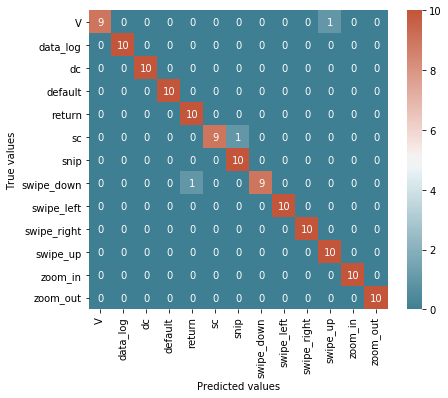

In [11]:
x_y_test('User_A1_011017', 'User_A2_011017') # User_A1, User_A2

This score is usually higher then 95%. Nevertheless there are some more aspects that need to be covered. This score is achieved with an experienced user who has previously learned to perform consistent gestures. The human learning process is covered in section 2.

-----

# 2. Human Impacts: 

## 2.1. Human-learning process:
This experiment shows the human-learning process and how it affects the data quality. 
For this 3 tests are conducted:
1. **(B1-B2)-Test**: Here an inexperienced user records two datasets. One is used for training (the first recording ever) and the second is used for training (procedure see (A1-A2)-Test). 
2. **(B1)-Test**: Here an inexperienced user records his/her first dataset (procedure see (A1-Test)
3. **(B2)-Test**: Here the user is already more experienced (procedure see (A1-Test))

#### (B1-B2-Test)

Accuracy of the current Train_test-split --------- : 0.76


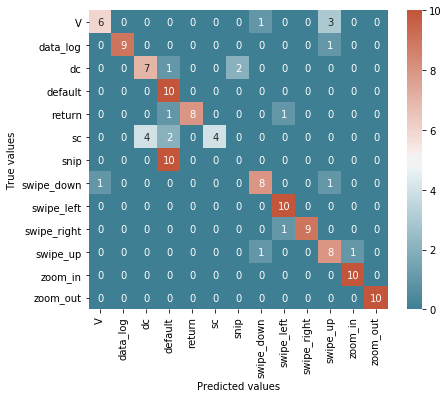

In [5]:
x_y_test('User_B1_131017', 'User_B2_131017') # User_B1, User_B2

In the beginning the inexperienced operator performs the gestures slowly and with a wide
range of arm motion. The more often a user trains the Gesture Control Interface, the smaller the variations in the
gesture executions get.

For example: An inexperienced operator records the gesture “return” several times. “return”
includes writing the letter “X” with the hand in the air. Initially it is drawn slowly and with
wide arm movements. After the 4 th or 5 th repetition (first sampling session), the user has
adapted and writes the “X” faster, with only spinning the wrist and using minor arm
movements.

The problem is: The sensor output per gesture is not consistent in this data recording session.
Here the first 4 or 5 executions differ from the subsequent ones. A classifier that is trained on
such a dataset is trained with at least 4 or 5 gestures that do not reflect the “normal” gesture
executions. Thus it later performs biased predictions

Not only must the GCI learn from the data, but also the users themselves need to learn to
perform consistent gestures. Inconsistent gesture executions lead to inconsistent data. A
classifier that is trained with inconsistent data performs biased predictions.

This behaviour can also be seen with the help of the (A1)-Test: First it is applied to the data of User_B1 (inexperienced) and then to User_B2 (more experienced). Again the Crossval score is of major importance:

#### (B1-Test)

RandomForestClassifier ---> Crossval score Accuracy: 0.81 (+/- 0.16)
Accuracy of the current Train_test-split --------- : 0.74


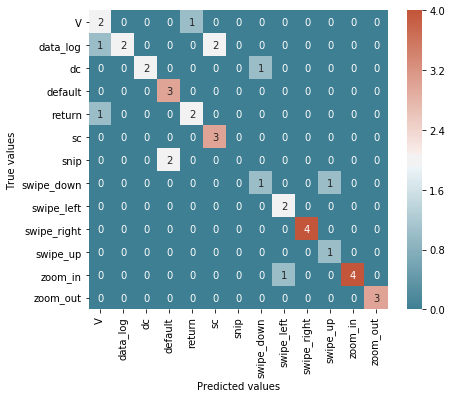

In [9]:
x_test('User_B1_131017') # B1-Test function call

#### (B2-Test)

RandomForestClassifier ---> Crossval score Accuracy: 0.95 (+/- 0.12)
Accuracy of the current Train_test-split --------- : 0.87


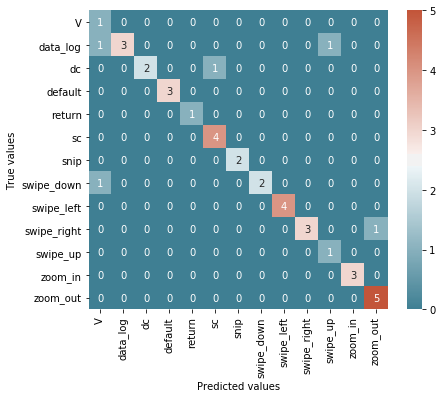

In [10]:
x_test('User_B2_131017') # B2-Test function call

## 2.2. Impact of forgetting gesture executions: (A1-A3)-Test

This experiment shows a user who forgets gesture executions over time: The "experienced"
user records two datasets within 11 days. Now the system is trained with the older
samples and applied to the newer dataset. The detection accuracy drops below 90%

Accuracy of the current Train_test-split --------- : 0.83


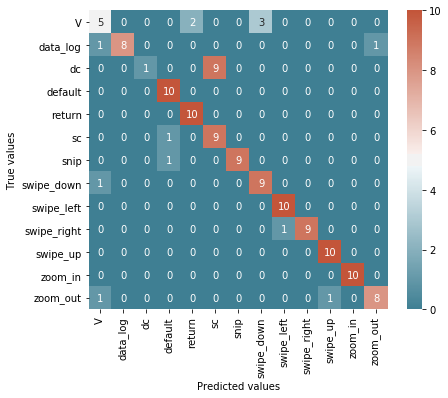

In [8]:
x_y_test('User_A1_011017', 'User_A3_121017') # User_A1, User_A3

In comparision to the (A1-A2)-Test, in which the user has recorded the datasets within 2 hours, the (A1-A3)-Test scores an 8% lower score. Thus the user forgot the proper gesture executions.

## 2.3. User dependency tests: (A1-B2)-Test

Here the classifier is trained with the data of user (A) and then applied to the gestures of user
(B). Both users are experienced. The experiment procedure is the same as in the (A1-A2)-Test
The objective of this experiment is to find out, how robust
the classifier is in performing user-independent gesture analysis.

Accuracy of the current Train_test-split --------- : 0.49


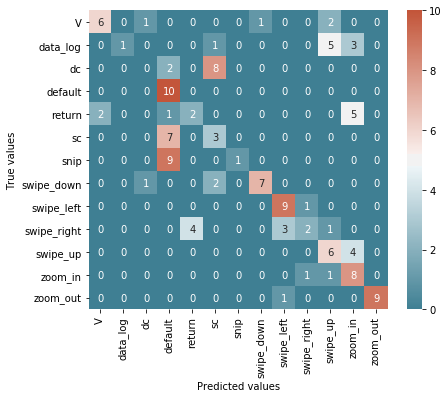

In [7]:
x_y_test('User_A1_011017', 'User_B2_131017') # User_A1, User_B2

The classifier is not capable to perform reliable gesture estimations.

----

# 3. Conclusion

technical aspects:
- The system is able to distinguish 13 gestures, which also involve more complex movements
- High prediction accuracies can be achieved (++95%). This is only possible, when the user is experienced with the gesture executions.

human aspects: The users need to be consistent in their gesture executions:
- The users need to learn themselves how to properly execute the gestures.
- The users have to use the system on a regular basis in order to properly remember these gestures
- In case new gestures shall be involved, their executions must be described in high detail, so that they can be reproduced by the users.

